In [103]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model


## Loading and Cleaning up the data set 

In [104]:
# Load the airbnh train dataset.
file_path = "AirBnB_data/train.csv"
airbnb_df = pd.read_csv(file_path)
airbnb_df.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [105]:
# Check the size of the data set
airbnb_df.shape

(74111, 29)

In [106]:
# Checking the number of null vallues
airbnb_df.isnull().sum().sort_values(ascending=False)

host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     966
bathrooms                   200
host_identity_verified      188
host_since                  188
host_has_profile_pic        188
beds                        131
bedrooms                     91
description                   0
name                          0
property_type                 0
room_type                     0
amenities                     0
number_of_reviews             0
accommodates                  0
longitude                     0
city                          0
latitude                      0
bed_type                      0
instant_bookable              0
cancellation_policy           0
cleaning_fee                  0
log_price                     0
id                            0
dtype: int64

In [107]:
# As the first step, only log_price", "accommodates","bathrooms", "city", "bedrooms", "beds", "latitude", "longitude", "review_scores_rating", "room_type", "property_type", "cancellation_policy", "instant_bookable" are considered as the features
# "log_price" is the target variable
airbnb_reduced_df = airbnb_df[["log_price", "accommodates","bathrooms", "city", "bedrooms", "beds", "latitude", "longitude", "review_scores_rating", "room_type", "property_type", "cancellation_policy", "instant_bookable"]]
airbnb_reduced_df.head(5)

,log_price,accommodates,bathrooms,city,bedrooms,beds,latitude,longitude,review_scores_rating,room_type,property_type,cancellation_policy,instant_bookable
0,5.010635,3,1.0,NYC,1.0,1.0,40.696524,-73.991617,100.0,Entire home/apt,Apartment,strict,f
1,5.129899,7,1.0,NYC,3.0,3.0,40.766115,-73.989040,93.0,Entire home/apt,Apartment,strict,t
2,4.976734,5,1.0,NYC,1.0,3.0,40.808110,-73.943756,92.0,Entire home/apt,Apartment,moderate,t
3,6.620073,4,1.0,SF,2.0,2.0,37.772004,-122.431619,NaN,Entire home/apt,House,flexible,f
4,4.744932,2,1.0,DC,0.0,1.0,38.925627,-77.034596,40.0,Entire home/apt,Apartment,moderate,t


### Getting two more features: "kitchen" and "Internet" from amenities column

In [108]:
# Define a function to filter an amenity from the aminities column
def has_amenity(amenity_list, amenity): 
    if amenity in amenity_list: 
        return True
    else: 
        return False

In [109]:
airbnb_reduced_df['has_kitchen']=airbnb_df['amenities'].str.lower().apply(lambda x: has_amenity(x, 'kitchen'))
airbnb_reduced_df.head(5)

/Users/ranilbasnayake/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,log_price,accommodates,bathrooms,city,bedrooms,beds,latitude,longitude,review_scores_rating,room_type,property_type,cancellation_policy,instant_bookable,has_kitchen
0,5.010635,3,1.0,NYC,1.0,1.0,40.696524,-73.991617,100.0,Entire home/apt,Apartment,strict,f,True
1,5.129899,7,1.0,NYC,3.0,3.0,40.766115,-73.989040,93.0,Entire home/apt,Apartment,strict,t,True
2,4.976734,5,1.0,NYC,1.0,3.0,40.808110,-73.943756,92.0,Entire home/apt,Apartment,moderate,t,True
3,6.620073,4,1.0,SF,2.0,2.0,37.772004,-122.431619,NaN,Entire home/apt,House,flexible,f,True
4,4.744932,2,1.0,DC,0.0,1.0,38.925627,-77.034596,40.0,Entire home/apt,Apartment,moderate,t,True


In [110]:
airbnb_reduced_df['has_internet']=airbnb_df['amenities'].str.lower().apply(lambda x: has_amenity(x, 'internet'))
airbnb_reduced_df.head(5)

/Users/ranilbasnayake/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,log_price,accommodates,bathrooms,city,bedrooms,beds,latitude,longitude,review_scores_rating,room_type,property_type,cancellation_policy,instant_bookable,has_kitchen,has_internet
0,5.010635,3,1.0,NYC,1.0,1.0,40.696524,-73.991617,100.0,Entire home/apt,Apartment,strict,f,True,True
1,5.129899,7,1.0,NYC,3.0,3.0,40.766115,-73.989040,93.0,Entire home/apt,Apartment,strict,t,True,True
2,4.976734,5,1.0,NYC,1.0,3.0,40.808110,-73.943756,92.0,Entire home/apt,Apartment,moderate,t,True,True
3,6.620073,4,1.0,SF,2.0,2.0,37.772004,-122.431619,NaN,Entire home/apt,House,flexible,f,True,True
4,4.744932,2,1.0,DC,0.0,1.0,38.925627,-77.034596,40.0,Entire home/apt,Apartment,moderate,t,True,True


In [111]:
# Drop nans
airbnb_reduced_df = airbnb_reduced_df.dropna()

In [112]:
# Check the size of the data set
airbnb_reduced_df.shape

(57129, 15)

In [113]:
airbnb_reduced_df['has_kitchen'].value_counts()

True     52431
False     4698
Name: has_kitchen, dtype: int64

In [114]:
airbnb_reduced_df['has_internet'].value_counts()

True     55946
False     1183
Name: has_internet, dtype: int64

In [115]:
# First 5 rows of the cleaned data set
airbnb_reduced_df.head(5)

,log_price,accommodates,bathrooms,city,bedrooms,beds,latitude,longitude,review_scores_rating,room_type,property_type,cancellation_policy,instant_bookable,has_kitchen,has_internet
0,5.010635,3,1.0,NYC,1.0,1.0,40.696524,-73.991617,100.0,Entire home/apt,Apartment,strict,f,True,True
1,5.129899,7,1.0,NYC,3.0,3.0,40.766115,-73.989040,93.0,Entire home/apt,Apartment,strict,t,True,True
2,4.976734,5,1.0,NYC,1.0,3.0,40.808110,-73.943756,92.0,Entire home/apt,Apartment,moderate,t,True,True
4,4.744932,2,1.0,DC,0.0,1.0,38.925627,-77.034596,40.0,Entire home/apt,Apartment,moderate,t,True,True
5,4.442651,2,1.0,SF,1.0,1.0,37.753164,-122.429526,100.0,Private room,Apartment,strict,t,False,True


In [116]:
# Count the number of unique values in the city column
airbnb_reduced_df.city.value_counts()

NYC        24887
LA         17114
SF          5029
DC          4084
Chicago     3204
Boston      2811
Name: city, dtype: int64

In [117]:
# Use the label Encoder to assign number for each city
LE = LabelEncoder()
airbnb_reduced_df['Location'] = LE.fit_transform(airbnb_reduced_df['city'])
airbnb_reduced_df['Room_type'] = LE.fit_transform(airbnb_reduced_df['room_type'])
airbnb_reduced_df['Property_type'] = LE.fit_transform(airbnb_reduced_df['property_type'])
airbnb_reduced_df['Cancellation_policy'] = LE.fit_transform(airbnb_reduced_df['cancellation_policy'])
airbnb_reduced_df['Instant_bookable'] = LE.fit_transform(airbnb_reduced_df['instant_bookable'])

In [118]:
# Drop the city, room_type, property_type, cancellation_policy, instant_bookable columns
airbnb_encoded_df= airbnb_reduced_df.drop(columns = ["city", "room_type", "property_type", "cancellation_policy", "instant_bookable"], axis=1)
airbnb_encoded_df.head(5)

,log_price,accommodates,bathrooms,bedrooms,beds,latitude,longitude,review_scores_rating,has_kitchen,has_internet,Location,Room_type,Property_type,Cancellation_policy,Instant_bookable
0,5.010635,3,1.0,1.0,1.0,40.696524,-73.991617,100.0,True,True,4,0,0,2,0
1,5.129899,7,1.0,3.0,3.0,40.766115,-73.989040,93.0,True,True,4,0,0,2,1
2,4.976734,5,1.0,1.0,3.0,40.808110,-73.943756,92.0,True,True,4,0,0,1,1
4,4.744932,2,1.0,0.0,1.0,38.925627,-77.034596,40.0,True,True,2,0,0,1,1
5,4.442651,2,1.0,1.0,1.0,37.753164,-122.429526,100.0,False,True,5,1,0,2,1


In [119]:
# Check the data type
airbnb_encoded_df.dtypes

log_price               float64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
latitude                float64
longitude               float64
review_scores_rating    float64
has_kitchen                bool
has_internet               bool
Location                  int64
Room_type                 int64
Property_type             int64
Cancellation_policy       int64
Instant_bookable          int64
dtype: object

In [120]:
# Chceck for duplicate entries
print(f"Duplicate Entries: {airbnb_encoded_df.duplicated().sum()}")

Duplicate Entries: 0


In [121]:
# Separate X and y training values
y = airbnb_encoded_df.log_price.values
X = airbnb_encoded_df.drop(columns="log_price").values

In [122]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Train the model and check the accuracy 

In [123]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled[:5]

array([[ 3.12997034, 11.93374158,  6.745681  ,  5.71469258, -1.39935979,
        -1.2087004 ,  0.75611243,  0.29996565,  0.14622964, -0.22889937,
        -0.8209705 ,  3.09385797,  0.91821619, -0.60602437],
       [-0.56737043,  0.47787783, -0.30985792, -0.58287318, -0.23744813,
        -1.39005571,  0.50177672,  0.29996565,  0.14622964,  1.43042257,
         1.00869411, -0.67616578,  0.91821619,  1.65009867],
       [-0.10520283, -0.40334246, -0.30985792,  0.20432254,  0.75704116,
         0.84871654,  0.12027314,  0.29996565,  0.14622964,  0.6007616 ,
         1.00869411, -0.67616578,  0.91821619, -0.60602437],
       [-1.02953803, -0.40334246, -0.30985792, -0.58287318,  0.72329332,
         0.84666173,  0.50177672,  0.29996565,  0.14622964,  0.6007616 ,
         1.00869411, -0.67616578, -0.32203131, -0.60602437],
       [-0.56737043, -0.40334246, -0.30985792, -0.58287318,  1.10661595,
         0.21425716, -0.76990186,  0.29996565,  0.14622964, -1.8882213 ,
         2.83835873,  1.33

In [124]:
# Check the mean and the standard deviation
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))

-1.6583642248053498e-19
1.0000000000001856


In [125]:
# Create a linear regression instance
#model = LinearRegression() 

# Create a Random forest Regresseon instance
model = RandomForestRegressor()

#model = linear_model.Ridge(alpha=10)

#fitting / training the model
model.fit(X_train_scaled,y_train) 

# predict the price
y_pred = model.predict(X_test_scaled) 
print(y_pred.shape)

(14283,)


In [126]:
# Training accuracy
training_accuracy = model.score(X_train_scaled,y_train)
print("training accuracy is: ",training_accuracy)


training accuracy is:  0.9624811287611768


In [127]:
# #  Compute model parameters
# print(model.coef_) 
# print(model.intercept_)  

In [128]:
# Find the error
error_df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]
error_df.head(10)

,Predicted,Actual,Error
0,4.284010,4.543295,-0.259285
1,4.016091,3.218876,0.797215
2,4.078232,3.931826,0.146407
3,3.721429,4.248495,-0.527066
4,3.862055,3.663562,0.198493
5,4.942155,4.605170,0.336985
6,4.624785,4.499810,0.124976
7,4.532554,4.317488,0.215066
8,4.813615,4.787492,0.026123
9,4.566764,4.465908,0.100856


In [129]:
# Graph the absolute error
fig = px.scatter(x=error_df.index, y=error_df["Error"].abs(),
                title="Absolute Error for Each Prediction")
#px.xlabel("Data row")
#px.ylabel("Absolute Error")
fig.show()

In [130]:
# Get the size of the X-train data set
X_train.shape

(42846, 14)

In [131]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.11759210259738677


In [132]:
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.733644485842574


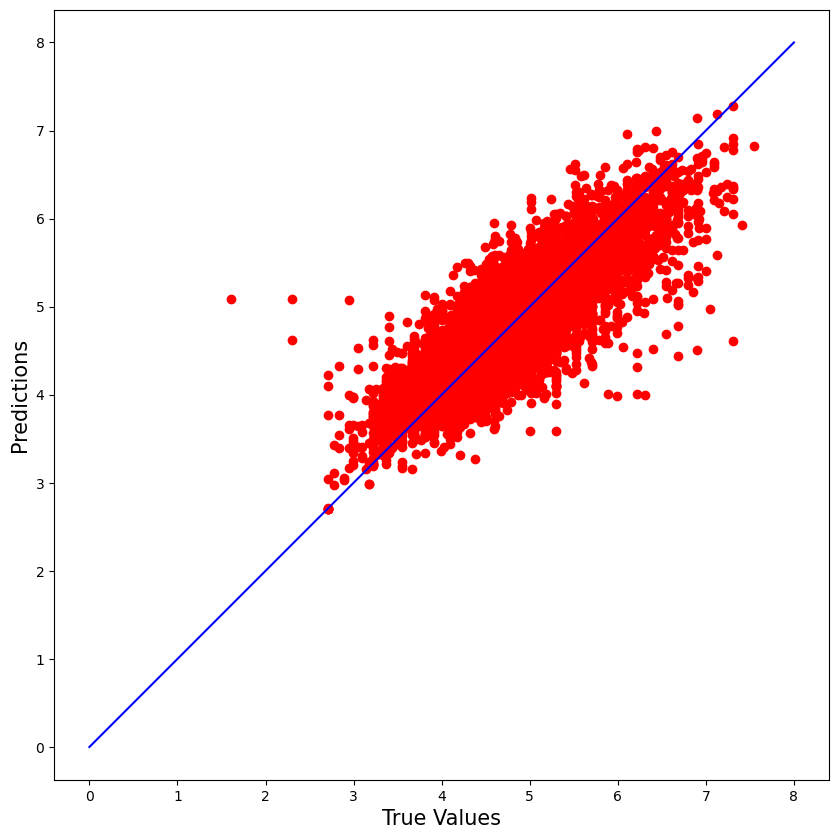

In [133]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='red')
plt.plot([0,8], [0,8], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()